# City of Austin Service Request Data

## Below I am analyzing data from the City of Austin 
This csv originally has 976,844 rows of data and 22 columns

In [57]:
#Reading the Data
#Creating Data Frame

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Austin.csv', low_memory=False)
print(df.head())

  Service Request (SR) Number         SR Description    Method Received  \
0                 14-00038134  Injured / Sick Animal              Phone   
1                 16-00179282              Loose Dog  Spot311 Interface   
2                 17-00162675              Loose Dog              Phone   
3                 17-00316853              Loose Dog              Phone   
4                 18-00304952      Wildlife Exposure              Phone   

  SR Status      Status Change Date            Created Date  \
0    Closed  10/22/2019 03:09:24 PM  03/05/2014 12:03:09 PM   
1    Closed  10/22/2019 03:48:31 PM  07/14/2016 12:31:30 AM   
2    Closed  10/22/2019 03:48:30 PM  06/13/2017 07:44:41 AM   
3    Closed  10/22/2019 03:57:27 PM  10/23/2017 07:27:11 AM   
4    Closed  10/22/2019 12:00:21 PM  09/13/2018 09:35:32 AM   

         Last Update Date              Close Date  \
0  10/22/2019 03:09:25 PM  10/22/2019 03:09:24 PM   
1  10/22/2019 03:48:31 PM  10/22/2019 03:48:31 PM   
2  10/22/20

In [14]:
#Analyzing Column
print(df['Last Update Date'].head(5))

0    10/22/2019 03:09:25 PM
1    10/22/2019 03:48:31 PM
2    10/22/2019 03:48:30 PM
3    10/22/2019 03:57:28 PM
4    10/22/2019 12:00:24 PM
Name: Last Update Date, dtype: object


In [58]:
#Viewing Data
df.head()

,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Close Date,SR Location,Street Number,...,Zip Code,County,State Plane X Coordinate,State Plane Y Coordinate,Latitude Coordinate,Longitude Coordinate,(Latitude.Longitude),Council District,Map Page,Map Tile
0,14-00038134,Injured / Sick Animal,Phone,Closed,10/22/2019 03:09:24 PM,03/05/2014 12:03:09 PM,10/22/2019 03:09:25 PM,10/22/2019 03:09:24 PM,"4701 N IH 35 NB, AUSTIN, TX",4701,...,NaN,NaN,3.123448e+06,1.008451e+07,30.305296,-97.712850,"(30.30529556, -97.7128501)",NaN,NaN,NaN
1,16-00179282,Loose Dog,Spot311 Interface,Closed,10/22/2019 03:48:31 PM,07/14/2016 12:31:30 AM,10/22/2019 03:48:31 PM,10/22/2019 03:48:31 PM,"4708 PEWTER LN, AUSTIN, TX 78744",4708,...,78744.0,TRAVIS,3.115801e+06,1.004627e+07,30.200677,-97.739902,"(30.20067695, -97.73990173)",2.0,645S,MJ16
2,17-00162675,Loose Dog,Phone,Closed,10/22/2019 03:48:30 PM,06/13/2017 07:44:41 AM,10/22/2019 03:48:30 PM,10/22/2019 03:48:30 PM,"4800 COPPERBEND BLVD, AUSTIN, TX 78744",4800,...,78744.0,TRAVIS,3.115986e+06,1.004567e+07,30.199014,-97.739362,"(30.19901391, -97.73936184)",2.0,645T,MJ16
3,17-00316853,Loose Dog,Phone,Closed,10/22/2019 03:57:27 PM,10/23/2017 07:27:11 AM,10/22/2019 03:57:28 PM,10/22/2019 03:57:27 PM,"9800 CURLEW DR, AUSTIN, TX 78748",9800,...,78748.0,TRAVIS,3.086236e+06,1.003734e+07,30.177969,-97.834101,"(30.17796916, -97.83410077)",5.0,672M,MD14
4,18-00304952,Wildlife Exposure,Phone,Closed,10/22/2019 12:00:21 PM,09/13/2018 09:35:32 AM,10/22/2019 12:00:24 PM,10/22/2019 12:00:21 PM,"500 E CESAR CHAVEZ ST, AUSTIN, TX 78701",500,...,78701.0,TRAVIS,3.115352e+06,1.006865e+07,30.262203,-97.739670,"(30.26220349, -97.73967045)",9.0,585X,MJ22


## Datetime Conversion

In [60]:
#Changing date into datetime

df["Status Change Date"]=pd.to_datetime(df["Status Change Date"])
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Last Update Date"]=pd.to_datetime(df["Last Update Date"])
df["Close Date"]=pd.to_datetime(df["Close Date"])

## Splitting Data

In [61]:
print(df['Service Request (SR) Number'].head())

0    14-00038134
1    16-00179282
2    17-00162675
3    17-00316853
4    18-00304952
Name: Service Request (SR) Number, dtype: object


In [62]:
#Splitting Column into two different ones
df[["SR Year", "NumDel"]] = df["Service Request (SR) Number"].str.split(pat="-", expand=True)

#Dropping Columns That Are Not Needed
df = df.drop(columns=['NumDel', 'Map Tile', 'Map Page','Council District','(Latitude.Longitude)','Street Name','Street Number'])
df.head()

,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Close Date,SR Location,City,Zip Code,County,State Plane X Coordinate,State Plane Y Coordinate,Latitude Coordinate,Longitude Coordinate,SR Year
0,14-00038134,Injured / Sick Animal,Phone,Closed,2019-10-22 15:09:24,2014-03-05 12:03:09,2019-10-22 15:09:25,2019-10-22 15:09:24,"4701 N IH 35 NB, AUSTIN, TX",AUSTIN,NaN,NaN,3.123448e+06,1.008451e+07,30.305296,-97.712850,14
1,16-00179282,Loose Dog,Spot311 Interface,Closed,2019-10-22 15:48:31,2016-07-14 00:31:30,2019-10-22 15:48:31,2019-10-22 15:48:31,"4708 PEWTER LN, AUSTIN, TX 78744",AUSTIN,78744.0,TRAVIS,3.115801e+06,1.004627e+07,30.200677,-97.739902,16
2,17-00162675,Loose Dog,Phone,Closed,2019-10-22 15:48:30,2017-06-13 07:44:41,2019-10-22 15:48:30,2019-10-22 15:48:30,"4800 COPPERBEND BLVD, AUSTIN, TX 78744",AUSTIN,78744.0,TRAVIS,3.115986e+06,1.004567e+07,30.199014,-97.739362,17
3,17-00316853,Loose Dog,Phone,Closed,2019-10-22 15:57:27,2017-10-23 07:27:11,2019-10-22 15:57:28,2019-10-22 15:57:27,"9800 CURLEW DR, AUSTIN, TX 78748",AUSTIN,78748.0,TRAVIS,3.086236e+06,1.003734e+07,30.177969,-97.834101,17
4,18-00304952,Wildlife Exposure,Phone,Closed,2019-10-22 12:00:21,2018-09-13 09:35:32,2019-10-22 12:00:24,2019-10-22 12:00:21,"500 E CESAR CHAVEZ ST, AUSTIN, TX 78701",AUSTIN,78701.0,TRAVIS,3.115352e+06,1.006865e+07,30.262203,-97.739670,18


In [63]:
df['SR Year'] = '20' + df['SR Year'] 

## Modifying Data

In [74]:
import numpy as np

df['Zip Code'] = df['Zip Code'].replace(np.nan, 0)
df['Zip Code'] = df['Zip Code'].astype(int)
df = df.drop(columns=['ZipCode'])
df.head()

,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Close Date,SR Location,City,Zip Code,County,State Plane X Coordinate,State Plane Y Coordinate,Latitude Coordinate,Longitude Coordinate,SR Year
0,14-00038134,Injured / Sick Animal,Phone,Closed,2019-10-22 15:09:24,2014-03-05 12:03:09,2019-10-22 15:09:25,2019-10-22 15:09:24,"4701 N IH 35 NB, AUSTIN, TX",AUSTIN,0,NaN,3.123448e+06,1.008451e+07,30.305296,-97.712850,2014
1,16-00179282,Loose Dog,Spot311 Interface,Closed,2019-10-22 15:48:31,2016-07-14 00:31:30,2019-10-22 15:48:31,2019-10-22 15:48:31,"4708 PEWTER LN, AUSTIN, TX 78744",AUSTIN,78744,TRAVIS,3.115801e+06,1.004627e+07,30.200677,-97.739902,2016
2,17-00162675,Loose Dog,Phone,Closed,2019-10-22 15:48:30,2017-06-13 07:44:41,2019-10-22 15:48:30,2019-10-22 15:48:30,"4800 COPPERBEND BLVD, AUSTIN, TX 78744",AUSTIN,78744,TRAVIS,3.115986e+06,1.004567e+07,30.199014,-97.739362,2017
3,17-00316853,Loose Dog,Phone,Closed,2019-10-22 15:57:27,2017-10-23 07:27:11,2019-10-22 15:57:28,2019-10-22 15:57:27,"9800 CURLEW DR, AUSTIN, TX 78748",AUSTIN,78748,TRAVIS,3.086236e+06,1.003734e+07,30.177969,-97.834101,2017
4,18-00304952,Wildlife Exposure,Phone,Closed,2019-10-22 12:00:21,2018-09-13 09:35:32,2019-10-22 12:00:24,2019-10-22 12:00:21,"500 E CESAR CHAVEZ ST, AUSTIN, TX 78701",AUSTIN,78701,TRAVIS,3.115352e+06,1.006865e+07,30.262203,-97.739670,2018


In [79]:
zipdf = df[['Service Request (SR) Number','City','Zip Code','County','SR Year','Created Date','Close Date']]
zipdf

,Service Request (SR) Number,City,Zip Code,County,SR Year,Created Date,Close Date
0,14-00038134,AUSTIN,0,NaN,2014,2014-03-05 12:03:09,2019-10-22 15:09:24
1,16-00179282,AUSTIN,78744,TRAVIS,2016,2016-07-14 00:31:30,2019-10-22 15:48:31
2,17-00162675,AUSTIN,78744,TRAVIS,2017,2017-06-13 07:44:41,2019-10-22 15:48:30
3,17-00316853,AUSTIN,78748,TRAVIS,2017,2017-10-23 07:27:11,2019-10-22 15:57:27
4,18-00304952,AUSTIN,78701,TRAVIS,2018,2018-09-13 09:35:32,2019-10-22 12:00:21
5,19-00085116,AUSTIN,78752,TRAVIS,2019,2019-03-10 13:46:17,2019-03-10 13:55:42
6,19-00117539,AUSTIN,78702,TRAVIS,2019,2019-04-04 10:53:44,2019-04-04 11:04:15
7,19-00186798,AUSTIN,78758,TRAVIS,2019,2019-05-22 10:22:16,2019-05-22 10:33:28
8,20-00102834,AUSTIN,78704,TRAVIS,2020,2020-03-19 14:03:31,2020-09-16 01:02:23
9,20-00129083,AUSTIN,78751,TRAVIS,2020,2020-04-02 20:46:45,NaT


## Graphing Data by Zip Code

In [105]:
zipdf['Create Day'] = zipdf['Created Date'].dt.date
zipdf['Close Day'] = zipdf['Close Date'].dt.date
zipdf['SR Life'] = zipdf['Close Day'] - zipdf['Create Day']
zipdf = zipdf.dropna(subset=['SR Life'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [140]:
#Grouping By Zip Code
X=zipdf[zipdf['Zip Code']>0].groupby('Zip Code').count()['Service Request (SR) Number'].sort_index()

Text(0.5, 1.0, 'Number of Service Requests in Each Zip Code')

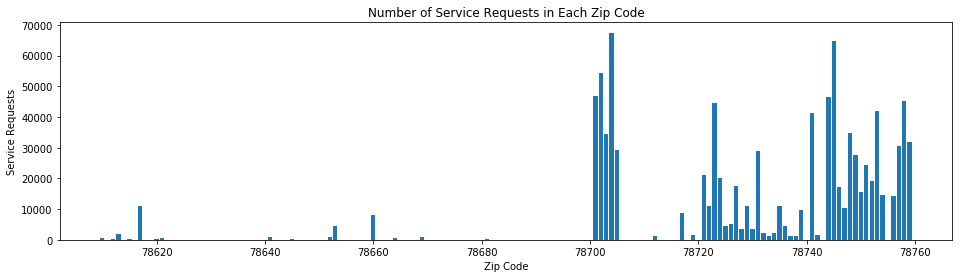

In [162]:
#Removing the Outliers
Xind = X[np.abs((X.index-np.mean(X.index))/np.std(X.index))<3]
plt.figure(figsize=(16,4))
plt.bar(Xind.index,Xind.values)
plt.xlabel('Zip Code')
plt.ylabel('Service Requests')
plt.title('Number of Service Requests in Each Zip Code')

## Graphing Data by County

Text(0.5, 1.0, 'Number of Service Requests in Each County')

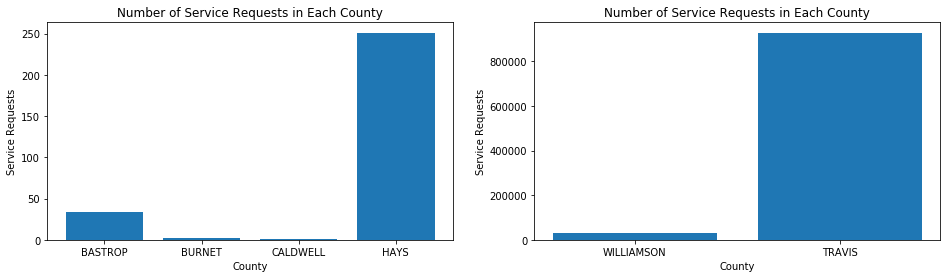

In [201]:
W = zipdf.dropna(subset=['County']).groupby('County').count()['Service Request (SR) Number'].sort_index()
Wupper = W[['WILLIAMSON','TRAVIS']]
Wlower = W[['BASTROP', 'BURNET', 'CALDWELL', 'HAYS']]

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(Wlower.index,Wlower.values)
plt.xlabel('County')
plt.ylabel('Service Requests')
plt.title('Number of Service Requests in Each County')

plt.subplot(1,2,2)
plt.bar(Wupper.index,Wupper.values)
plt.xlabel('County')
plt.ylabel('Service Requests')
plt.title('Number of Service Requests in Each County')

## Plotting Longitude and Latitude Coordinates

Text(0.5, 1.0, 'Lat-Long Coordinates')

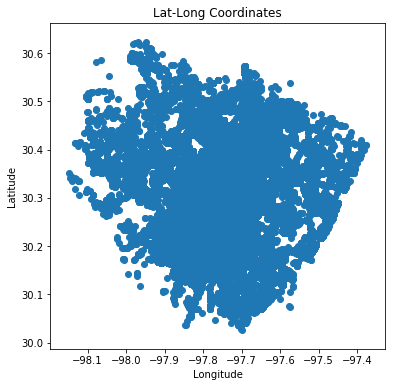

In [220]:
#Plotting map of longitude and latitude coordinates

#Removing Outliers
newdf = df[df['Longitude Coordinate']>-100]

plt.figure(figsize=(6,6))
plt.scatter(newdf['Longitude Coordinate'],newdf['Latitude Coordinate'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat-Long Coordinates')